# Read in data

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
mnist_dataset = tf.keras.datasets.mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [51]:
first_image = x_train[1, :, :]

In [57]:
first_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [52]:
type(first_image)

numpy.ndarray

In [53]:
first_image.shape

(28, 28)

In [54]:
from matplotlib import pyplot as plt

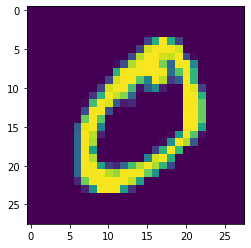

In [55]:
plt.imshow(first_image)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Preparing our implementation

## Generating one-hot encoded vectors

In [34]:
import numpy as np
a = np.array([1, 0, 3])

In [35]:
a

array([1, 0, 3])

In [36]:
type(a)

numpy.ndarray

In [37]:
b = np.zeros((a.size, a.max()+1))

In [38]:
b

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [39]:
np.arange(a.size)

array([0, 1, 2])

In [40]:
b[np.arange(a.size),a] = 1

In [41]:
b

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [44]:
b[[0,1,2],[1,0,3]] = 2

In [45]:
b

array([[0., 2., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 2.]])

In [46]:
y_train_onehot = np.zeros((y_train.size, y_train.max()+1))

In [47]:
y_train_onehot.shape

(60000, 10)

In [48]:
y_train_onehot[np.arange(y_train.size),y_train] = 1

In [49]:
y_train_onehot.shape

(60000, 10)

In [50]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [56]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Reshaping the 2D input to a 1D input

In [58]:
first_image.shape

(28, 28)

In [59]:
28*28

784

In [64]:
v = first_image.reshape(-1)

In [65]:
v

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [66]:
v.shape

(784,)

In [67]:
type(v)

numpy.ndarray

In [68]:
v.ndim

1

In [69]:
first_image.ndim

2

In [71]:
v_with_add_bias_input = np.append(v, [1])

In [72]:
v_with_add_bias_input.shape

(785,)

In [73]:
v_with_add_bias_input

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Generate a weight matrix

In [75]:
nr_inputs = 28**2 + 1

In [76]:
nr_inputs

785

In [77]:
nr_outputs = 10

In [78]:
W = np.zeros( (nr_inputs, nr_outputs) )

In [79]:
W.shape

(785, 10)

In [80]:
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
low = -1.0
high = +1.0
W = np.random.uniform( low, high, (nr_inputs, nr_outputs) )

In [85]:
W.shape

(785, 10)

In [86]:
W

array([[ 0.27710256,  0.75825928, -0.20588444, ..., -0.1388307 ,
         0.9196259 , -0.23930083],
       [-0.57974128,  0.65175502, -0.93804372, ..., -0.90029849,
         0.15392336,  0.70866865],
       [-0.02484117,  0.00592343,  0.68913386, ...,  0.94509945,
         0.26650553, -0.35183397],
       ...,
       [-0.95445677, -0.00934108,  0.35663944, ..., -0.57929605,
        -0.63043509,  0.32265589],
       [ 0.29811491, -0.86980915,  0.61478157, ...,  0.31544613,
        -0.58450464,  0.55827087],
       [ 0.88204335,  0.07060279, -0.24717148, ...,  0.10839854,
         0.16576741,  0.69876135]])

## Computing the output of the Perceptron for one input vector

In [88]:
v_with_add_bias_input.shape

(785,)

In [90]:
v_with_add_bias_input = v_with_add_bias_input.reshape(1,785)

In [91]:
v_with_add_bias_input.ndim

2

In [92]:
v_with_add_bias_input.shape

(1, 785)

In [89]:
W.shape

(785, 10)

In [96]:
act = np.matmul(v_with_add_bias_input, W)

In [97]:
act.shape

(1, 10)

In [98]:
act

array([[ 4516.44242115,   295.9877043 ,  -649.89882336,  2232.64917016,
         -373.37933364,  1214.77922929,  1474.6621912 ,   -87.70366882,
         -788.9819832 , -1245.35461614]])

## Given the activation vector, compute the output vector

In [99]:
def RELU(x):
    if x < 0:
        return 0
    else:
        return x

In [100]:
RELU(-0.5)

0

In [101]:
RELU(2.4)

2.4

In [102]:
type(act)

numpy.ndarray

In [103]:
act.shape

(1, 10)

In [109]:
RELU(act)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [106]:
RELU_vecfunc = np.vectorize(RELU, otypes=[float] )

In [110]:
out = RELU_vecfunc(act)

In [111]:
out

array([[4516.44242115,  295.9877043 ,    0.        , 2232.64917016,
           0.        , 1214.77922929, 1474.6621912 ,    0.        ,
           0.        ,    0.        ]])

In [108]:
act

array([[ 4516.44242115,   295.9877043 ,  -649.89882336,  2232.64917016,
         -373.37933364,  1214.77922929,  1474.6621912 ,   -87.70366882,
         -788.9819832 , -1245.35461614]])

## Computing the error

In [112]:
out

array([[4516.44242115,  295.9877043 ,    0.        , 2232.64917016,
           0.        , 1214.77922929, 1474.6621912 ,    0.        ,
           0.        ,    0.        ]])

In [116]:
out.shape

(1, 10)

In [117]:
out1D = out.reshape(-1)

In [118]:
out1D

array([4516.44242115,  295.9877043 ,    0.        , 2232.64917016,
          0.        , 1214.77922929, 1474.6621912 ,    0.        ,
          0.        ,    0.        ])

In [119]:
out1D.shape

(10,)

In [120]:
target_vector = y_train_onehot[1,:]

In [121]:
target_vector.shape

(10,)

In [122]:
target_vector

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [123]:
error_vector = target_vector - out1D

In [124]:
error_vector

array([-4515.44242115,  -295.9877043 ,     0.        , -2232.64917016,
           0.        , -1214.77922929, -1474.6621912 ,     0.        ,
           0.        ,     0.        ])

## Compute all the weight changes based to the Perceptron learning rule

In [125]:
nr_outputs

10

In [126]:
nr_inputs

785

In [127]:
v_with_add_bias_input.shape

(1, 785)

In [128]:
alpha = 0.001

for out_neuron_nr in range(0,nr_outputs):
    for inp_nr in range(0,nr_inputs):
        weight = W[inp_nr, out_neuron_nr]
        
        # Compute weight change for the current weight
        # based on the Perceptron Learning Rule
        delta_weight = v_with_add_bias_input[0,inp_nr] * error_vector[out_neuron_nr] * alpha
        
        # Learning happens here!
        W[inp_nr, out_neuron_nr] += delta_weight

weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change:  -0.0
weight change

# All we need for a Perceptron

In [40]:
import tensorflow as tf
import numpy as np
import random

def act_func_relu_scalar(x):
    if x < 0:
        return 0
    else:
        return x
    
act_func_relu_vector = np.vectorize(act_func_relu_scalar, otypes=[float] )


def prepare_data():
    
    # 1. load MNIST dataset
    mnist_dataset = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
    
    # 2. map image pixel values from [0,255] to [0,1]
    x_train = x_train.astype(float)
    x_test  = x_test.astype(float)
    
    x_train = x_train * (1.0/255.0)
    x_test  = x_test  * (1.0/255.0)
    
    # 3. map train data target labels to one-hot encoded vectors
    y_train_onehot = np.zeros((y_train.size, y_train.max()+1))
    y_train_onehot[np.arange(y_train.size),y_train] = 1
    
    # 4. map test data target labels to one-hot encoded vectors
    y_test_onehot = np.zeros((y_test.size, y_train.max()+1))
    y_test_onehot[np.arange(y_test.size),y_test] = 1
    
    return x_train, y_train_onehot, \
           x_test,  y_test_onehot


def perceptron_predict(image,W):
        
    # 1. transform 2D input image (28x28 pixel) to 1D vector
    v = image.reshape(-1)
    
    # 2. add bias input to input vector v
    v_with_add_bias_input = np.append(v, [1])
    
    # 3. compute activations of all <nr_outputs> output neurons
    act = np.matmul(v_with_add_bias_input, W)
        
    # 4. compute output vector given activation vector
    out = act_func_relu_vector(act)
    
    return v_with_add_bias_input, out
    
    

def preceptron_train(v_with_add_bias_input,y,t,W):
    
    # 1. compute error for each of the output neurons
    error_vector = t - y
    
    # 2. define learning rate
    alpha = 0.001
    
    # 3. for all output neurons ...
    for out_neuron_nr in range(0,nr_outputs):
        
        # for all inputs of that output neuron ...
        for inp_nr in range(0,nr_inputs):
            
            # get current weight
            weight = W[inp_nr, out_neuron_nr]

            # compute weight change for the current weight
            # based on the Perceptron learning rule
            delta_weight = v_with_add_bias_input[inp_nr] * error_vector[out_neuron_nr] * alpha

            # Learning happens here!
            W[inp_nr, out_neuron_nr] += delta_weight
            
            
def perceptron_test(x_test, y_test, W):
    
    nr_test_samples = x_test.shape[0]
    
    correct = 0
    for sample_id in range(0,nr_test_samples):

        # get next test sample
        image       = x_test[sample_id]
        teacher_vec = y_test[sample_id]
        
        # compute prediction vector
        v_with_add_bias_input, pred_vec = perceptron_predict(image,W)
        
        # compute predicted label
        pred_label = np.argmax(pred_vec)
        
        # get actual label
        gt_label = np.argmax(teacher_vec)
        
        #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))
        
        # was the predicted label correct?
        if pred_label == gt_label:
            correct += 1
            
    acc = correct/nr_test_samples
    return acc
   

    
# 1. get training data
x_train, y_train, x_test, y_test = prepare_data()


# 2. prepare a weight matrix for the Perceptron
nr_inputs = 28**2 + 1
nr_outputs = 10
low = -1.0
high = +1.0
W = np.random.uniform( low, high, (nr_inputs, nr_outputs) )


# 3. training
nr_train_samples = x_train.shape[0]
NR_TRAIN_EPOCHS = 3

accs = []

for epoch_nr in range(0,NR_TRAIN_EPOCHS):
    
    print("\nstarting epoch {0}".format(epoch_nr))
    
    # prepare a list with all training sample IDs in random order    
    training_sample_ids = [i for i in range(0,nr_train_samples)]
    random.shuffle(training_sample_ids)    
    #print(training_sample_ids)
    
    # for each training sample in the training dataset ...
    correct = 0    
    for train_step_nr in range(0,nr_train_samples):

        # get next training sample
        sample_id   = training_sample_ids.pop(0)
        image       = x_train[sample_id]
        teacher_vec = y_train[sample_id]
        
        # compute prediction vector
        v_with_add_bias_input, pred_vec = perceptron_predict(image,W)
        
        # compute predicted label
        pred_label = np.argmax(pred_vec)
        
        # get actual label
        gt_label = np.argmax(teacher_vec)
        
        #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))
        
        if pred_label == gt_label:
            correct += 1
            
        # adapt weights due to error
        # and according to Perceptron learning rule?
        if True:
            preceptron_train(v_with_add_bias_input,pred_vec,teacher_vec,W)
                       
        if train_step_nr % 100 == 0:
            acc = perceptron_test(x_test, y_test, W)
            print("train step: {0} --> test data set accuracy: {1:.3f}".format(train_step_nr, acc))
            
            accs.append(acc)
        
print("\nfinished!")




starting epoch 0
train step: 0 --> test data set accuracy: 0.053
train step: 100 --> test data set accuracy: 0.052
train step: 200 --> test data set accuracy: 0.056
train step: 300 --> test data set accuracy: 0.069
train step: 400 --> test data set accuracy: 0.075
train step: 500 --> test data set accuracy: 0.078
train step: 600 --> test data set accuracy: 0.081
train step: 700 --> test data set accuracy: 0.083
train step: 800 --> test data set accuracy: 0.088
train step: 900 --> test data set accuracy: 0.090
train step: 1000 --> test data set accuracy: 0.095
train step: 1100 --> test data set accuracy: 0.101
train step: 1200 --> test data set accuracy: 0.103
train step: 1300 --> test data set accuracy: 0.105
train step: 1400 --> test data set accuracy: 0.110
train step: 1500 --> test data set accuracy: 0.116
train step: 1600 --> test data set accuracy: 0.119
train step: 1700 --> test data set accuracy: 0.124
train step: 1800 --> test data set accuracy: 0.127
train step: 1900 --> test

train step: 16000 --> test data set accuracy: 0.453
train step: 16100 --> test data set accuracy: 0.441
train step: 16200 --> test data set accuracy: 0.451
train step: 16300 --> test data set accuracy: 0.453
train step: 16400 --> test data set accuracy: 0.455
train step: 16500 --> test data set accuracy: 0.460
train step: 16600 --> test data set accuracy: 0.451
train step: 16700 --> test data set accuracy: 0.441
train step: 16800 --> test data set accuracy: 0.439
train step: 16900 --> test data set accuracy: 0.455
train step: 17000 --> test data set accuracy: 0.452
train step: 17100 --> test data set accuracy: 0.454
train step: 17200 --> test data set accuracy: 0.453
train step: 17300 --> test data set accuracy: 0.455
train step: 17400 --> test data set accuracy: 0.452
train step: 17500 --> test data set accuracy: 0.460
train step: 17600 --> test data set accuracy: 0.469
train step: 17700 --> test data set accuracy: 0.467
train step: 17800 --> test data set accuracy: 0.461
train step: 

train step: 31800 --> test data set accuracy: 0.520
train step: 31900 --> test data set accuracy: 0.524
train step: 32000 --> test data set accuracy: 0.527
train step: 32100 --> test data set accuracy: 0.530
train step: 32200 --> test data set accuracy: 0.525
train step: 32300 --> test data set accuracy: 0.519
train step: 32400 --> test data set accuracy: 0.528
train step: 32500 --> test data set accuracy: 0.530
train step: 32600 --> test data set accuracy: 0.533
train step: 32700 --> test data set accuracy: 0.537
train step: 32800 --> test data set accuracy: 0.532
train step: 32900 --> test data set accuracy: 0.528
train step: 33000 --> test data set accuracy: 0.537
train step: 33100 --> test data set accuracy: 0.529
train step: 33200 --> test data set accuracy: 0.526
train step: 33300 --> test data set accuracy: 0.517
train step: 33400 --> test data set accuracy: 0.531
train step: 33500 --> test data set accuracy: 0.535
train step: 33600 --> test data set accuracy: 0.535
train step: 

train step: 47600 --> test data set accuracy: 0.573
train step: 47700 --> test data set accuracy: 0.578
train step: 47800 --> test data set accuracy: 0.587
train step: 47900 --> test data set accuracy: 0.599
train step: 48000 --> test data set accuracy: 0.588
train step: 48100 --> test data set accuracy: 0.591
train step: 48200 --> test data set accuracy: 0.593
train step: 48300 --> test data set accuracy: 0.589
train step: 48400 --> test data set accuracy: 0.591
train step: 48500 --> test data set accuracy: 0.575
train step: 48600 --> test data set accuracy: 0.577
train step: 48700 --> test data set accuracy: 0.576
train step: 48800 --> test data set accuracy: 0.581
train step: 48900 --> test data set accuracy: 0.563
train step: 49000 --> test data set accuracy: 0.584
train step: 49100 --> test data set accuracy: 0.587
train step: 49200 --> test data set accuracy: 0.593
train step: 49300 --> test data set accuracy: 0.591
train step: 49400 --> test data set accuracy: 0.586
train step: 

train step: 3500 --> test data set accuracy: 0.618
train step: 3600 --> test data set accuracy: 0.600
train step: 3700 --> test data set accuracy: 0.600
train step: 3800 --> test data set accuracy: 0.598
train step: 3900 --> test data set accuracy: 0.613
train step: 4000 --> test data set accuracy: 0.614
train step: 4100 --> test data set accuracy: 0.601
train step: 4200 --> test data set accuracy: 0.609
train step: 4300 --> test data set accuracy: 0.607
train step: 4400 --> test data set accuracy: 0.605
train step: 4500 --> test data set accuracy: 0.612
train step: 4600 --> test data set accuracy: 0.617
train step: 4700 --> test data set accuracy: 0.602
train step: 4800 --> test data set accuracy: 0.609
train step: 4900 --> test data set accuracy: 0.614
train step: 5000 --> test data set accuracy: 0.607
train step: 5100 --> test data set accuracy: 0.599
train step: 5200 --> test data set accuracy: 0.597
train step: 5300 --> test data set accuracy: 0.600
train step: 5400 --> test data 

train step: 19400 --> test data set accuracy: 0.628
train step: 19500 --> test data set accuracy: 0.616
train step: 19600 --> test data set accuracy: 0.624
train step: 19700 --> test data set accuracy: 0.615
train step: 19800 --> test data set accuracy: 0.623
train step: 19900 --> test data set accuracy: 0.625
train step: 20000 --> test data set accuracy: 0.625
train step: 20100 --> test data set accuracy: 0.621
train step: 20200 --> test data set accuracy: 0.617
train step: 20300 --> test data set accuracy: 0.618
train step: 20400 --> test data set accuracy: 0.620
train step: 20500 --> test data set accuracy: 0.627
train step: 20600 --> test data set accuracy: 0.634
train step: 20700 --> test data set accuracy: 0.635
train step: 20800 --> test data set accuracy: 0.626
train step: 20900 --> test data set accuracy: 0.637
train step: 21000 --> test data set accuracy: 0.637
train step: 21100 --> test data set accuracy: 0.626
train step: 21200 --> test data set accuracy: 0.637
train step: 

train step: 35200 --> test data set accuracy: 0.649
train step: 35300 --> test data set accuracy: 0.657
train step: 35400 --> test data set accuracy: 0.647
train step: 35500 --> test data set accuracy: 0.654
train step: 35600 --> test data set accuracy: 0.657
train step: 35700 --> test data set accuracy: 0.657
train step: 35800 --> test data set accuracy: 0.653
train step: 35900 --> test data set accuracy: 0.646
train step: 36000 --> test data set accuracy: 0.646
train step: 36100 --> test data set accuracy: 0.640
train step: 36200 --> test data set accuracy: 0.653
train step: 36300 --> test data set accuracy: 0.654
train step: 36400 --> test data set accuracy: 0.651
train step: 36500 --> test data set accuracy: 0.646
train step: 36600 --> test data set accuracy: 0.648
train step: 36700 --> test data set accuracy: 0.654
train step: 36800 --> test data set accuracy: 0.654
train step: 36900 --> test data set accuracy: 0.653
train step: 37000 --> test data set accuracy: 0.665
train step: 

train step: 51000 --> test data set accuracy: 0.647
train step: 51100 --> test data set accuracy: 0.646
train step: 51200 --> test data set accuracy: 0.651
train step: 51300 --> test data set accuracy: 0.655
train step: 51400 --> test data set accuracy: 0.662
train step: 51500 --> test data set accuracy: 0.675
train step: 51600 --> test data set accuracy: 0.671
train step: 51700 --> test data set accuracy: 0.670
train step: 51800 --> test data set accuracy: 0.663
train step: 51900 --> test data set accuracy: 0.654
train step: 52000 --> test data set accuracy: 0.644
train step: 52100 --> test data set accuracy: 0.654
train step: 52200 --> test data set accuracy: 0.658
train step: 52300 --> test data set accuracy: 0.656
train step: 52400 --> test data set accuracy: 0.655
train step: 52500 --> test data set accuracy: 0.647
train step: 52600 --> test data set accuracy: 0.660
train step: 52700 --> test data set accuracy: 0.645
train step: 52800 --> test data set accuracy: 0.656
train step: 

train step: 6900 --> test data set accuracy: 0.668
train step: 7000 --> test data set accuracy: 0.671
train step: 7100 --> test data set accuracy: 0.671
train step: 7200 --> test data set accuracy: 0.676
train step: 7300 --> test data set accuracy: 0.670
train step: 7400 --> test data set accuracy: 0.672
train step: 7500 --> test data set accuracy: 0.666
train step: 7600 --> test data set accuracy: 0.672
train step: 7700 --> test data set accuracy: 0.692
train step: 7800 --> test data set accuracy: 0.684
train step: 7900 --> test data set accuracy: 0.679
train step: 8000 --> test data set accuracy: 0.670
train step: 8100 --> test data set accuracy: 0.667
train step: 8200 --> test data set accuracy: 0.679
train step: 8300 --> test data set accuracy: 0.679
train step: 8400 --> test data set accuracy: 0.668
train step: 8500 --> test data set accuracy: 0.664
train step: 8600 --> test data set accuracy: 0.673
train step: 8700 --> test data set accuracy: 0.677
train step: 8800 --> test data 

train step: 22800 --> test data set accuracy: 0.692
train step: 22900 --> test data set accuracy: 0.699
train step: 23000 --> test data set accuracy: 0.694
train step: 23100 --> test data set accuracy: 0.689
train step: 23200 --> test data set accuracy: 0.683
train step: 23300 --> test data set accuracy: 0.699
train step: 23400 --> test data set accuracy: 0.689
train step: 23500 --> test data set accuracy: 0.689
train step: 23600 --> test data set accuracy: 0.682
train step: 23700 --> test data set accuracy: 0.679
train step: 23800 --> test data set accuracy: 0.682
train step: 23900 --> test data set accuracy: 0.693
train step: 24000 --> test data set accuracy: 0.697
train step: 24100 --> test data set accuracy: 0.702
train step: 24200 --> test data set accuracy: 0.705
train step: 24300 --> test data set accuracy: 0.703
train step: 24400 --> test data set accuracy: 0.698
train step: 24500 --> test data set accuracy: 0.695
train step: 24600 --> test data set accuracy: 0.692
train step: 

train step: 38600 --> test data set accuracy: 0.705
train step: 38700 --> test data set accuracy: 0.702
train step: 38800 --> test data set accuracy: 0.701
train step: 38900 --> test data set accuracy: 0.698
train step: 39000 --> test data set accuracy: 0.698
train step: 39100 --> test data set accuracy: 0.699
train step: 39200 --> test data set accuracy: 0.705
train step: 39300 --> test data set accuracy: 0.709
train step: 39400 --> test data set accuracy: 0.714
train step: 39500 --> test data set accuracy: 0.709
train step: 39600 --> test data set accuracy: 0.701
train step: 39700 --> test data set accuracy: 0.711
train step: 39800 --> test data set accuracy: 0.709
train step: 39900 --> test data set accuracy: 0.716
train step: 40000 --> test data set accuracy: 0.707
train step: 40100 --> test data set accuracy: 0.699
train step: 40200 --> test data set accuracy: 0.699
train step: 40300 --> test data set accuracy: 0.706
train step: 40400 --> test data set accuracy: 0.697
train step: 

train step: 54400 --> test data set accuracy: 0.708
train step: 54500 --> test data set accuracy: 0.703
train step: 54600 --> test data set accuracy: 0.699
train step: 54700 --> test data set accuracy: 0.699
train step: 54800 --> test data set accuracy: 0.697
train step: 54900 --> test data set accuracy: 0.685
train step: 55000 --> test data set accuracy: 0.684
train step: 55100 --> test data set accuracy: 0.689
train step: 55200 --> test data set accuracy: 0.698
train step: 55300 --> test data set accuracy: 0.704
train step: 55400 --> test data set accuracy: 0.708
train step: 55500 --> test data set accuracy: 0.712
train step: 55600 --> test data set accuracy: 0.718
train step: 55700 --> test data set accuracy: 0.717
train step: 55800 --> test data set accuracy: 0.714
train step: 55900 --> test data set accuracy: 0.716
train step: 56000 --> test data set accuracy: 0.715
train step: 56100 --> test data set accuracy: 0.719
train step: 56200 --> test data set accuracy: 0.713
train step: 

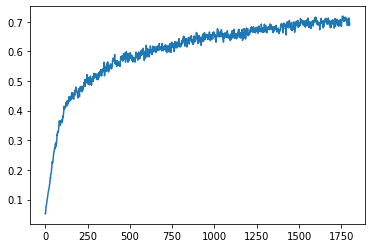

In [42]:
from matplotlib import pyplot as plt
plt.plot(accs)
plt.show()